## Cifar: Neuronales Netz bauen

https://www.cs.toronto.edu/~kriz/cifar.html

### ImageDataGenerator

=> https://keras.io/preprocessing/image/

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

import numpy as np

X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

[1]


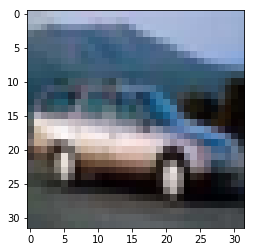

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_train[4])
plt.imshow(X_train[4])
plt.show()

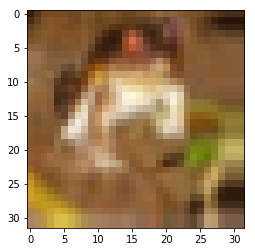

In [51]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(width_shift_range=3, height_shift_range=3, zoom_range=0.1, horizontal_flip=True)

for batch in gen.flow(X_train, y_train, shuffle=False):
    # print(batch[0].shape)
    # print(batch[1])
    
    first_image = batch[0][0]
    plt.imshow(first_image)
    plt.show()
    break

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation="relu", padding="same"))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [26]:
### Modell visualisieren: https://keras.io/visualization/
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
__________

In [27]:
y_train_car = y_train == 1

model.fit(X_train, y_train_car, batch_size=128, epochs=10, shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 14s 289us/step - loss: 0.2846 - acc: 0.8966
Epoch 2/10
50000/50000 [==============================] - 14s 277us/step - loss: 0.1744 - acc: 0.9320
Epoch 3/10
50000/50000 [==============================] - 14s 276us/step - loss: 0.1320 - acc: 0.9507
Epoch 4/10
50000/50000 [==============================] - 14s 275us/step - loss: 0.1061 - acc: 0.9612
Epoch 5/10
50000/50000 [==============================] - 14s 277us/step - loss: 0.0898 - acc: 0.9680
Epoch 6/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.0803 - acc: 0.9717
Epoch 7/10
50000/50000 [==============================] - 14s 279us/step - loss: 0.0739 - acc: 0.9741
Epoch 8/10
50000/50000 [==============================] - 14s 277us/step - loss: 0.0671 - acc: 0.9767
Epoch 9/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.0653 - acc: 0.9771
Epoch 10/10
50000/50000 [==============================] - 14s 275us/step - loss: 

In [28]:
print(model.evaluate(X_train, y_train_car))

50000/50000 [==============================] - 8s 155us/step
[0.04251760511681438, 0.98638]


In [29]:
y_test_car = y_test == 1
print(model.evaluate(X_test, y_test_car))

10000/10000 [==============================] - 2s 155us/step
[0.06877978416383267, 0.977]
